In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("./xlsx/시차상관분석4Data.xlsx",index_col=0)

df = df.set_index("DateTime")
df

,Unnamed: 0,종가_ex,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,...,국고10년대비,통안1년대비,통안2년대비,전일비_1Y_베이시스,전일비_2Y_베이시스,전일비_3Y_베이시스,전일비_5Y_베이시스,전일비_10Y_베이시스,전날 종가_ex,종가_NDF차이
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-02,1,1131.7,2.820,2.690,2.690,2.720,2.860,2.08,1.845,1.85,...,-0.21,-0.03,0.02,2.0,8.0,9.0,9.0,9.0,1126.5,-7.50
2012-08-03,2,1134.8,2.790,2.660,2.660,2.690,2.840,2.07,1.830,1.83,...,-0.03,-0.03,0.00,2.0,1.5,1.0,-5.0,-13.0,1131.7,-6.30
2012-08-06,3,1129.0,2.810,2.680,2.680,2.710,2.850,2.07,1.805,1.80,...,-0.03,-0.01,0.02,-2.0,-4.5,-5.0,-6.0,-5.0,1134.8,6.30
2012-08-07,4,1128.8,2.820,2.680,2.680,2.720,2.870,2.09,1.820,1.80,...,-0.04,-0.01,-0.01,1.0,1.5,0.0,-8.0,-10.0,1129.0,0.00
2012-08-08,5,1128.3,2.830,2.700,2.700,2.740,2.900,2.10,1.820,1.80,...,-0.04,-0.06,-0.03,0.0,-2.0,-2.0,-4.0,-7.0,1128.8,-1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,2455,1313.7,3.165,3.235,3.205,3.125,2.965,2.55,2.730,2.71,...,-0.11,0.05,0.00,-4.0,-1.0,0.0,-2.0,0.0,1313.0,3.15
2022-07-26,2456,1307.6,3.155,3.215,3.175,3.095,2.935,2.56,2.700,2.68,...,-0.08,0.01,-0.05,2.0,-1.0,0.0,1.0,1.0,1313.7,2.70
2022-07-27,2457,1313.3,3.145,3.165,3.115,3.035,2.875,2.57,2.690,2.67,...,0.01,-0.01,-0.02,2.0,4.0,5.0,5.0,5.0,1307.6,-2.90


In [3]:
df.columns

Index(['Unnamed: 0', '종가_ex', '1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
       '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs', '2Y_Mid_crs', '3Y_Mid_crs',
       '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년', '국고10년', '통안364일',
       '통안2년', 'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스',
       '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트', '전일대비_종가_ex', '등락률_종가_ex',
       '전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs',
       '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs',
       '국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비',
       '전일비_1Y_베이시스', '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스',
       '전일비_10Y_베이시스', '전날 종가_ex', '종가_NDF차이'],
      dtype='object')

In [4]:
df['종가_NDF차이'] = df['전날 종가_ex'] - df['Mid_ndf']

In [5]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df[['전일비_1Y_베이시스', '국고1년대비',  '국고3년대비',  '국고5년대비',  '국고10년대비', '통안1년대비', '통안2년대비',
            '전일비_ndf', '전날 종가_ex']]
y = df['종가_ex']

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_32708\2998267214.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,전일비_1Y_베이시스,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비,전일비_ndf,전날 종가_ex
DateTime,,,,,,,,,
2012-08-02,0.348741,1.898958,-0.488709,-1.584904,-5.377146,-0.325433,0.267777,0.079167,-0.149841
2012-08-03,0.348741,0.051587,0.004075,0.035699,-0.767092,-0.325433,0.014814,0.184972,-0.056232
2012-08-06,-0.350946,0.051587,-0.160187,2.466603,-0.767092,-0.108742,0.267777,-0.449862,-0.000426
2012-08-07,0.173819,-0.564203,-0.160187,-0.504502,-1.023207,-0.108742,-0.111668,0.020386,-0.104837
2012-08-08,-0.001103,-0.564203,-0.324448,0.035699,-1.023207,-0.650470,-0.364632,0.055654,-0.108437
...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-1.179994,1.975212,-0.234402,-2.816005,0.541331,0.014814,0.154406,3.207485
2022-07-26,0.348741,0.667378,0.825382,-1.314804,-2.047663,0.107949,-0.617595,0.050952,3.220086
2022-07-27,0.348741,0.051587,0.661120,-1.584904,0.257364,-0.108742,-0.238150,-0.026639,3.110275


In [6]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,전일비_1Y_베이시스,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비,전일비_ndf,전날 종가_ex,종가_ex
DateTime,,,,,,,,,,
2012-08-02,0.348741,1.898958,-0.488709,-1.584904,-5.377146,-0.325433,0.267777,0.079167,-0.149841,1131.7
2012-08-03,0.348741,0.051587,0.004075,0.035699,-0.767092,-0.325433,0.014814,0.184972,-0.056232,1134.8
2012-08-06,-0.350946,0.051587,-0.160187,2.466603,-0.767092,-0.108742,0.267777,-0.449862,-0.000426,1129.0
2012-08-07,0.173819,-0.564203,-0.160187,-0.504502,-1.023207,-0.108742,-0.111668,0.020386,-0.104837,1128.8
2012-08-08,-0.001103,-0.564203,-0.324448,0.035699,-1.023207,-0.650470,-0.364632,0.055654,-0.108437,1128.3
...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-1.179994,1.975212,-0.234402,-2.816005,0.541331,0.014814,0.154406,3.207485,1313.7
2022-07-26,0.348741,0.667378,0.825382,-1.314804,-2.047663,0.107949,-0.617595,0.050952,3.220086,1307.6
2022-07-27,0.348741,0.051587,0.661120,-1.584904,0.257364,-0.108742,-0.238150,-0.026639,3.110275,1313.3


In [7]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['전일비_1Y_베이시스',  '국고3년대비',  '국고5년대비','전일비_ndf', '전날 종가_ex']
label_cols = ['종가_ex']

In [8]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 5), (389, 1, 5))

In [9]:
x_train

array([[[-0.52586811, -0.16018659, -0.23440197,  0.1450014 ,
         -1.64578612]],

       [[ 0.17381924, -0.32444798, -0.23440197, -0.31584158,
         -0.47567256]],

       [[ 0.52366291,  0.0040748 ,  0.57589949, -0.29232918,
          0.44061637]],

       ...,

       [[-0.52586811,  0.0040748 , -0.23440197, -0.05485397,
         -2.13543365]],

       [[-0.35094627,  0.49685899,  0.57589949,  0.57762951,
          0.60983279]],

       [[-0.35094627,  0.1683362 , -1.04470342,  0.1332452 ,
         -0.33885928]]])

In [10]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 5), (513, 1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

Epoch 1/200
94/98 [===========================>..] - ETA: 0s - loss: 1268859.8750 - mae: 1125.3273
Epoch 1: val_loss improved from inf to 1259105.75000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 12s 87ms/step - loss: 1268766.5000 - mae: 1125.2881 - val_loss: 1259105.7500 - val_mae: 1120.8568
Epoch 2/200
98/98 [==============================] - ETA: 0s - loss: 1268133.6250 - mae: 1125.0068
Epoch 2: val_loss improved from 1259105.75000 to 1258318.50000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 74ms/step - loss: 1268133.6250 - mae: 1125.0068 - val_loss: 1258318.5000 - val_mae: 1120.5037
Epoch 3/200
93/98 [===========================>..] - ETA: 0s - loss: 1266549.6250 - mae: 1124.2982
Epoch 3: val_loss improved from 1258318.50000 to 1256731.12500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 8s 80ms/step -

17/17 [==============================] - 1s 2ms/step


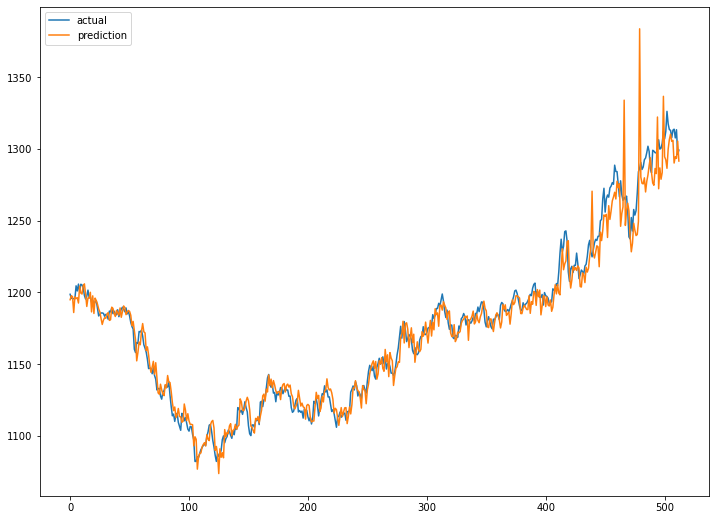

In [12]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()